<a href="https://colab.research.google.com/github/deepintomlf/mlfbook/blob/master/Chapter4_TreeModels/%E6%A0%91%E6%A8%A1%E5%9E%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第四章：树模型

## **不纯度度量指标**

1.  误分类
2.  基尼系数
3.  交叉熵

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


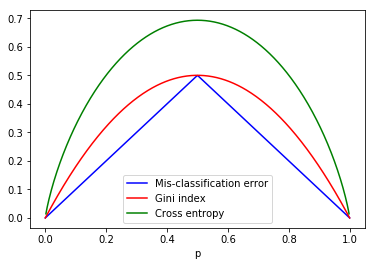

In [12]:
import numpy as np
import matplotlib.pyplot as plt

p_vec = np.linspace(0.0, 1.0, num=500)

# 误分类
mis_cl_error_vec = np.minimum(1-p_vec, p_vec)

# 基尼系数
gini_vec = 2*np.multiply(p_vec, 1-p_vec)

# 交叉熵
cross_entropy_vec = -np.multiply(p_vec, np.log(p_vec))- np.multiply(1-p_vec, np.log(1-p_vec))

plt.plot(p_vec, mis_cl_error_vec, 'b')
plt.plot(p_vec, gini_vec, 'r')
plt.plot(p_vec, cross_entropy_vec, 'g')
plt.legend(['Mis-classification error', 'Gini index', 'Cross entropy'] )
plt.xlabel('p')
plt.savefig('LossFuncTreeModel.png', dpi=500)

In [0]:
from google.colab import files

files.download('LossFuncTreeModel.png')

## 决策树

In [0]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 加载Iris数据集
iris = load_iris()

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=0)

# 构建决策树分类器
clf_dt = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=0)
clf_dt = clf_dt.fit(X_train, y_train) 
y_test_est = clf_dt.predict(X_test)

In [15]:
# 输出混淆矩阵
pd.crosstab(y_test, y_test_est, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1,2
Actual Species,,,
0,16,0,0
1,0,18,1
2,0,0,15


In [16]:
# 查看特征重要性
print(clf_dt.feature_importances_)

[0.         0.         0.40929056 0.59070944]


In [0]:
# 安装graphviz
!pip install graphviz

In [17]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(clf_dt, out_file=None, feature_names=iris.feature_names, 
                                class_names=iris.target_names, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("iris") 

'iris.pdf'

In [0]:
import os
print(os.getcwd())
from google.colab import files
files.download("/content/iris.pdf" ) 

/content


## 随机森林




In [0]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# 构建随机森林
clf_rf = RandomForestClassifier(n_estimators=20, max_depth=3, criterion = 'gini', n_jobs=2, random_state=0)
clf_rf = clf_rf.fit(X_train, y_train)
y_test_est_rf = clf_rf.predict(X_test)

In [20]:
clf_rf.predict_proba(X_test)[0:10]

array([[0.        , 0.04109848, 0.95890152],
       [0.0016129 , 0.96141246, 0.03697464],
       [0.9       , 0.1       , 0.        ],
       [0.        , 0.04859117, 0.95140883],
       [1.        , 0.        , 0.        ],
       [0.        , 0.00414673, 0.99585327],
       [1.        , 0.        , 0.        ],
       [0.0016129 , 0.97252357, 0.02586353],
       [0.0016129 , 0.89752357, 0.10086353],
       [0.0016129 , 0.96141246, 0.03697464]])

In [21]:
# 输出混淆矩阵
pd.crosstab(y_test, y_test_est_rf, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1,2
Actual Species,,,
0,16,0,0
1,0,18,1
2,0,3,12


In [0]:
# 查看特征重要性
print(clf_rf.feature_importances_)

[0.17255122 0.01588397 0.39389304 0.41767177]


## 梯度提升树

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

# 构建梯度提升树 
clf_gbt = GradientBoostingClassifier(n_estimators=20, max_depth=3, random_state=0)
clf_gbt.fit(X_train, y_train)
y_test_est_gbt = clf_rf.predict(X_test)

In [25]:
# 输出混淆矩阵
pd.crosstab(y_test, y_test_est_gbt, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1,2
Actual Species,,,
0,16,0,0
1,0,18,1
2,0,3,12


In [26]:
# 查看特征重要性
print(clf_gbt.feature_importances_)

[0.0036455  0.01010523 0.3386665  0.64758277]


## **输出拟合结果**

Confusion matrix, without normalization
[[16  0  0]
 [ 0 18  1]
 [ 0  0 15]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.94736842 0.05263158]
 [0.         0.         1.        ]]


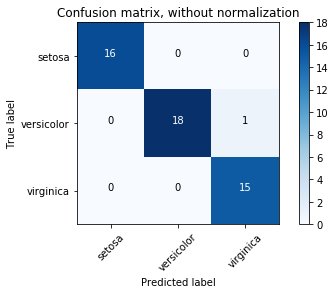

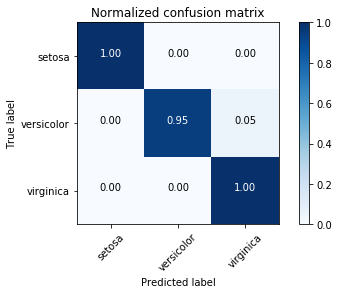

In [71]:
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b = 0)

## The code for the function plot_confusion_matrix() is attributed to http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

# Plot non-normalized confusion matrix
from sklearn.metrics import confusion_matrix
cm =  confusion_matrix(y_test, y_test_est)
plt.figure()
plot_confusion_matrix(cm, classes= iris.target_names, title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm, classes= iris.target_names, normalize=True, title='Normalized confusion matrix')

In [69]:
cm_gbt =  confusion_matrix(y_test, y_test_est_gbt)
plt.figure()
plot_confusion_matrix(cm_gbt, classes= iris.target_names, title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm_gbt, classes= iris.target_names, normalize=True, title='Normalized confusion matrix')

NameError: ignored

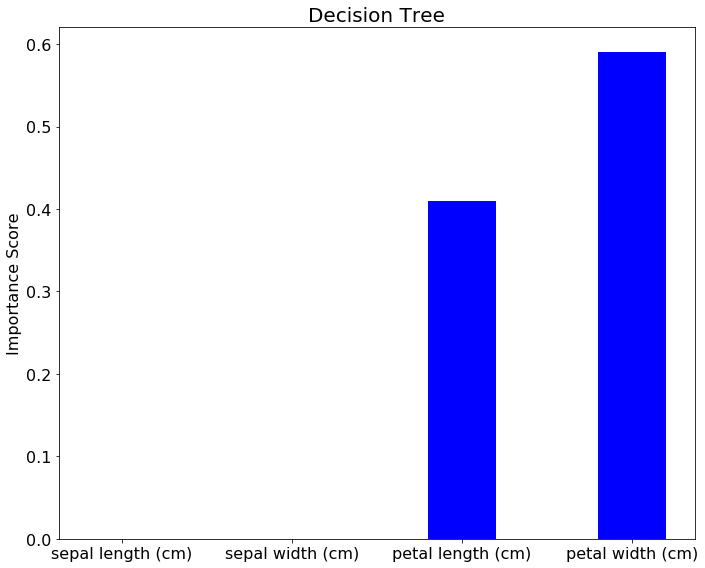

In [65]:
import matplotlib.pyplot as plt

# 决策树特征重要性

plt.figure(figsize=(10,8))
plt.bar(iris.feature_names, clf_dt.feature_importances_, width=0.4, color='blue')
plt.title('Decision Tree', fontsize=20)
plt.ylabel('Importance Score',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('feature_importance_dt.png')

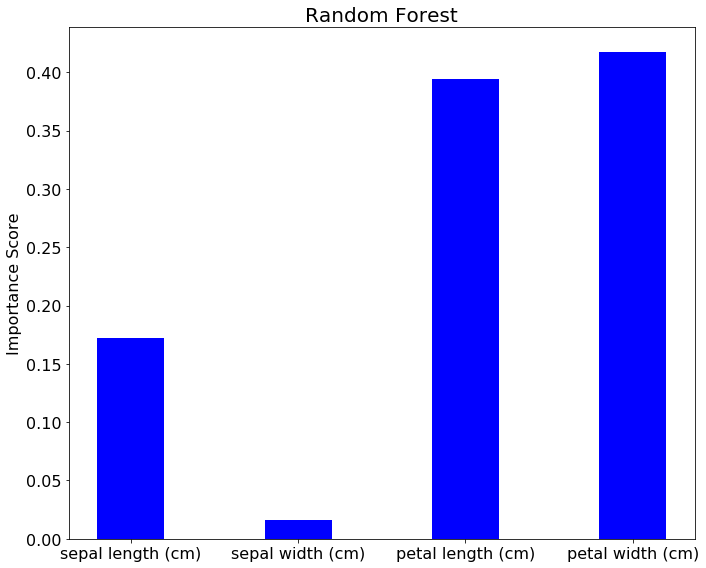

In [66]:
# 随机森林特征重要性

plt.figure(figsize=(10,8))
plt.bar(iris.feature_names, clf_rf.feature_importances_, width=0.4, color='blue')
plt.title('Random Forest', fontsize=20)
plt.ylabel('Importance Score',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('feature_importance_rf.png')

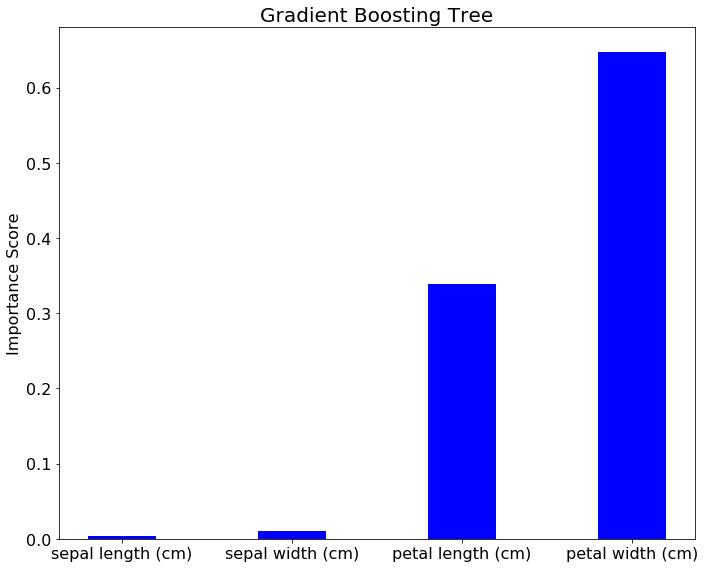

In [67]:
# 梯度提升树特征重要性

plt.figure(figsize=(10,8))
plt.bar(iris.feature_names, clf_gbt.feature_importances_, width=0.4, color='blue')
plt.title('Gradient Boosting Tree', fontsize=20)
plt.ylabel('Importance Score',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('feature_importance_gbt.png')

In [0]:
from google.colab import files

files.download('feature_importance_dt.png')
files.download('feature_importance_rf.png')
files.download('feature_importance_gbt.png')